# Taking raw .csv files and converting them to Pandas DataFrames

In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Tue Mar 30 14:57:44 2021


In [ ]:
### This box uploads all information and renames the columns based on the naming conventions used by the TimePix file creation system. 
### In new experiments there may be more or less columns, or they may be differently named. 
### It is important to check all errors and that the resulting DataFrame makes sense and has all expected information. 
filename = 'Foldername_within_current_folder/Filename'
it = pd.read_csv(f'{filename}.csv')
it
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])


### Save the DataFrame
I keep this next cell commented unless I am sure I want to change the file in my directory. 

In [3]:
#new_filename = '6ions_350V/Jumps_Six_350V_12'
#it.to_csv(new_filename)  ##### changes actual file
#it

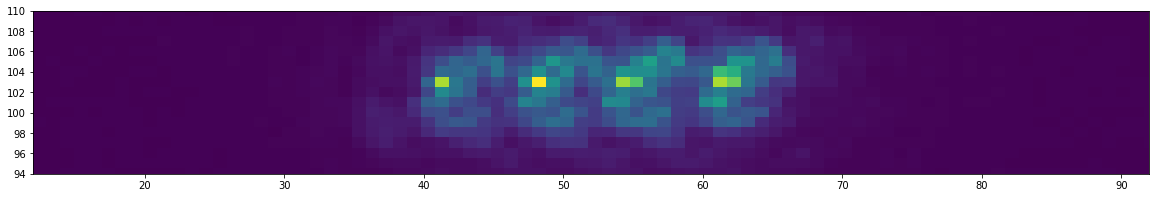

In [32]:
# This cell is used to see an image of the ions. Helpful to make sure ions did not move (blurry) and that there weren't spatial errors 
plt.figure(figsize=(20, 3))
filename = 'DC_var/Jumps_Four_320V_2'
it = pd.read_csv(filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), )#range = ([115, 125], [103, 109]))
x_guess = 52
y_guess = 102
plt.xlim(x_guess-40,x_guess+40)
plt.ylim(y_guess-8, y_guess+8)
x1 = 112; y1 = 112
x2 = 118; y2 = 112 
x3 = 124; y3 = 112
x4 = 129; y4 = 112 
x5 = 134; y5 = 112 
x6 = 140; y6 = 113
plt.savefig('Ions.svg')

# Eliminate blank space
Use this code to eliminate sections in which the crystal melted and the data was 'ion soup'. That type of data does nothing but introduce error. 

In [83]:
filename = '6ions_350V/Jumps_Six_350V_12'
it = pd.read_csv(filename)  
it = it.drop(columns = {'Unnamed: 0'})
it

,y,x,time,center flux,cluster size
0,133,127,0,1575,7
1,34,166,49675776,1575,6
2,255,89,124512768,675,3
3,23,174,391346432,2025,8
4,56,120,457581312,950,5
...,...,...,...,...,...
1017859,117,114,16591415418112,725,4
1017860,77,56,16591419067136,975,6
1017861,180,157,16591422899968,1675,5
1017862,115,158,16591428301568,2650,8


These next few cells are confusing. Use the top cell to identify the exact locations of melted crystal or empty space. Then use the second cell to remove the space between and bridge the gap in time to make it appear as if there was no melting. It's like stitching the sections together. The third cell is just a verification. And the last cell changes the Pandas Dataframe that is saved in the directory. 

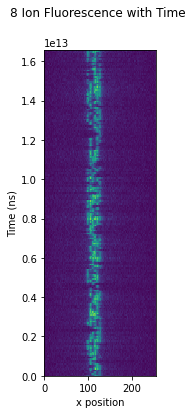

In [85]:
# Check the data over time to see if there are times in which the chain is broken or melted. 
fig, (ax0) = plt.subplots(ncols=1, figsize=(2,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 200])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = it['time'].min(); end = 1e12; duration = end - start
#ax0.set_ylim(start, end)

In [ ]:

it = it.query(f'{start} > time or time > {end}')
times = np.array(it['time'])
new_times = []
for i in range(len(times)):
    if times[i] > start :
        new_times.append(times[i] - duration)
    else:
        new_times.append(times[i])
        
it['time'] = new_times


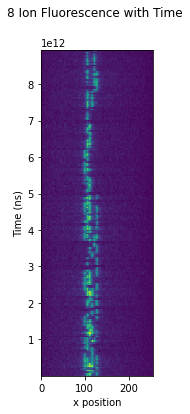

In [80]:
# Verify that the changes actually happend
fig, (ax0) = plt.subplots(ncols=1, figsize=(2,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 200])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')


start = .4e13; end = .585e13
#ax0.set_ylim(start, end)

### Change the actual file again to exist without 'ion soup'

In [81]:

#it.to_csv(filename)  ##### changes actual file
